In [2]:
import tensorflow.compat.v1.keras.backend as K
from matplotlib import pyplot as plt
from DDPG import DDPG, Agent
from Car import CarRacing
import tensorflow as tf
import numpy as np
import keyboard

#================Enable GPU usage====================================
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.compat.v1.disable_eager_execution()
tf.compat.v1.reset_default_graph
sess = tf.compat.v1.Session()
K.set_session(sess)

#========Operational Instructions=========
render = True
debugging = True
training = True

#===========Constants================
n_episodes = 7000
env = CarRacing(obstacles = False)
agent = Agent(env, sess)
total_steps = 0
total_rewards = []
avg_score = []

#================Main loop===============================
for episode in range(n_episodes):
    env.reset()
    episode_step = 0
    print('\n','='*10,'Episode ',episode+1, '='*10)
    done = False
    episode_reward = 0
    while not done:
        if render: isopen = env.render()
        else: isopen = True
        if debugging and keyboard.is_pressed('`'): done = True; isopen = False; break

        episode_step += 1
        done, reward = agent.step(training, episode+1, episode_step)
        episode_reward += reward

    total_rewards.append(episode_reward)
    avg_score.append(np.mean(total_rewards[-100:]))
    print('Episode Score: {} | AVG Score: {} | Maximum Episode Score: {}'.format(episode_reward, avg_score[-1], np.max(total_rewards)))
    # if (episode+1) % 2 == 0: 
    #     agent.save_rewards(total_rewards, 'total')
    #     agent.save_rewards(avg_score, 'avg')
        
    total_steps += episode_step
    
    if not isopen: env.close();  break
env.close()

C:\Users\jesse\AppData\Roaming\Python\Python38\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))

 ========== Episode  1 ==========
D:\Software\ANACONDA\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv1/Relu}}]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv1/Relu}}]]
	 [[dense_1/Softmax/_83]]
0 successful operations.
0 derived errors ignored.

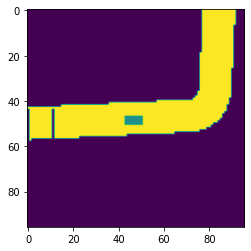

In [2]:
plt.imshow(env.state)~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~